In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# ***Question 1*** - Biggest predictor of CO2 output


In [2]:
# import data
df_gdp = pd.read_csv("https://raw.githubusercontent.com/Opeth1973/Project_Assignement_CO2/refs/heads/main/gdp-per-capita-worldbank.csv")
df_ff = pd.read_csv("https://raw.githubusercontent.com/Opeth1973/Project_Assignement_CO2/refs/heads/main/fossil-fuel-cons-per-capita.csv")

#df_gdp.head()
#df_ff.head()


In [3]:
# Rename column in df_gdp & df_ff
df_gdp.rename(columns={'GDP per capita, PPP (constant 2017 international $)': "GDP"}, inplace=True)
df_ff.rename(columns={'Coal per capita (kWh)': "Coal"}, inplace=True)
df_ff.rename(columns={'Oil per capita (kWh)': "Oil"}, inplace=True)
df_ff.rename(columns={'Gas per capita (kWh)': "Gas"}, inplace=True)

# Drop code column in gdp dataframe
#df_gdp.drop(['Code'], axis=1, inplace=True)

# Merge gpd & fossil fuel dataframe
df_merged = pd.merge(df_gdp, df_ff ,how='outer', on=['Entity', 'Year'])

# Create total fossil fuel column
df_merged['Total ff'] = df_merged['Coal'] + df_merged['Oil'] + df_merged['Gas']

# Copy dataset & Drop rows with missing values
df_final = df_merged.copy()
df_final.dropna(inplace=True)
df_final.head()

,Entity,Code_x,Year,GDP,Code_y,Coal,Oil,Gas,Total ff
137,Algeria,DZA,1990,8828.8740,DZA,300.34280,4381.6636,7645.5117,12327.51810
138,Algeria,DZA,1991,8517.3770,DZA,302.61072,4233.1133,7373.2754,11908.99942
139,Algeria,DZA,1992,8471.5270,DZA,351.31350,4160.7373,7437.8086,11949.85940
140,Algeria,DZA,1993,8109.8840,DZA,279.75610,4048.8980,6527.0747,10855.72880
141,Algeria,DZA,1994,7869.2705,DZA,258.10210,3796.0720,6735.4660,10789.64010


In [4]:
# Calculate correlation between gpd and total fossil fuel usage
#corr_coefficient, p_value = pearsonr = pearsonr(df_final['GDP'], df_final['Total ff'])
corr_from_df_Total = df_final[['Total ff', 'GDP']].corr(numeric_only=True)
corr_from_df_Coal = df_final[['Coal', 'GDP']].corr(numeric_only=True)
corr_from_df_Oil = df_final[['Oil', 'GDP']].corr(numeric_only=True)
corr_from_df_Gas = df_final[['Gas', 'GDP']].corr(numeric_only=True)

# print('\n')
# print("Correlation with pearsonr = ", corr_coefficient, " with a p-value of ", p_value)
print('\n')
print("correlation with corr = ", corr_from_df_Total)
print('\n')
print("correlation with corr = ", corr_from_df_Coal)
print('\n')
print("correlation with corr = ", corr_from_df_Oil)
print('\n')
print("correlation with corr = ", corr_from_df_Gas)




correlation with corr =            Total ff       GDP
Total ff  1.000000  0.685141
GDP       0.685141  1.000000


correlation with corr =            Coal       GDP
Coal  1.000000  0.087994
GDP   0.087994  1.000000


correlation with corr =            Oil       GDP
Oil  1.000000  0.755838
GDP  0.755838  1.000000


correlation with corr =            Gas       GDP
Gas  1.000000  0.381485
GDP  0.381485  1.000000


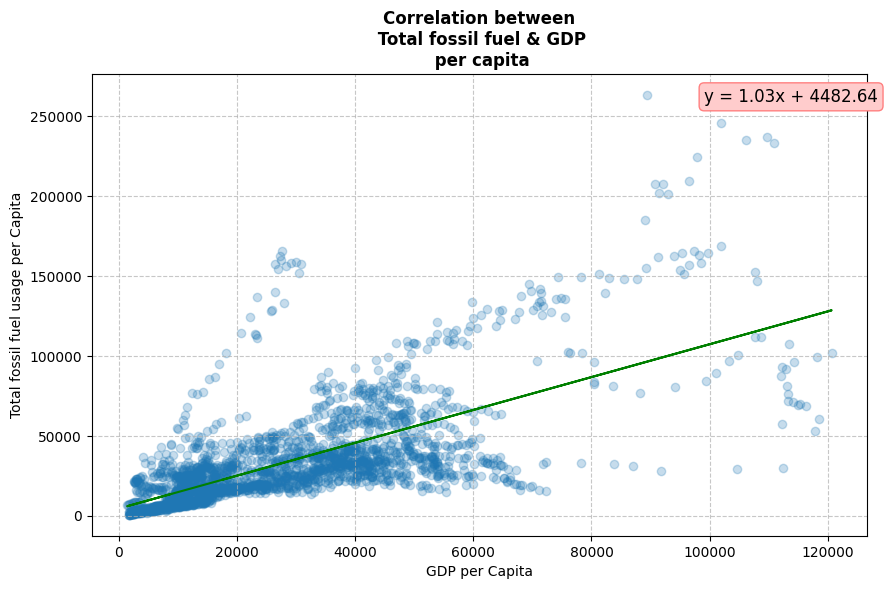

In [5]:
# Visualize the correlation for Total

plt.figure(figsize=(10, 6))

# By using linear regression line in this chart we can find the general realtionship in GDP and Gini_index
slope, intercept = np.polyfit(df_final['GDP'],df_final['Total ff'], 1)
plt.plot(df_final['GDP'], slope * df_final['GDP'] + intercept, color='green')

plt.scatter(df_final['GDP'],df_final['Total ff'], alpha=0.25)

# Add the equation to the plot
equation = f"y = {slope:.2f}x + {intercept:.2f}"
plt.text(0.79, 0.95, equation, transform=plt.gca().transAxes, fontsize=12, va='center', bbox=dict(boxstyle="round", ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8)))

plt.xlabel('GDP per Capita')
plt.ylabel('Total fossil fuel usage per Capita')
plt.title('Correlation between\n Total fossil fuel & GDP\n per capita', fontweight = 'bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

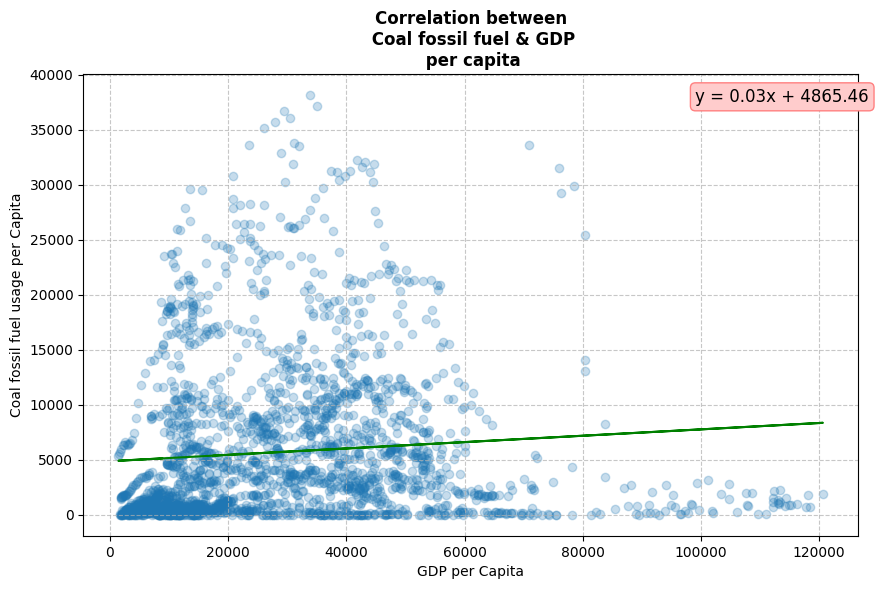

In [6]:
# Visualize the correlation for Coal

plt.figure(figsize=(10, 6))

# By using linear regression line in this chart we can find the general realtionship in GDP and Gini_index
slope, intercept = np.polyfit(df_final['GDP'],df_final['Coal'], 1)
plt.plot(df_final['GDP'], slope * df_final['GDP'] + intercept, color='green')

plt.scatter(df_final['GDP'],df_final['Coal'], alpha=0.25)

# Add the equation to the plot
equation = f"y = {slope:.2f}x + {intercept:.2f}"
plt.text(0.79, 0.95, equation, transform=plt.gca().transAxes, fontsize=12, va='center', bbox=dict(boxstyle="round", ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8)))

plt.xlabel('GDP per Capita')
plt.ylabel('Coal fossil fuel usage per Capita')
plt.title('Correlation between\n Coal fossil fuel & GDP\n per capita', fontweight = 'bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

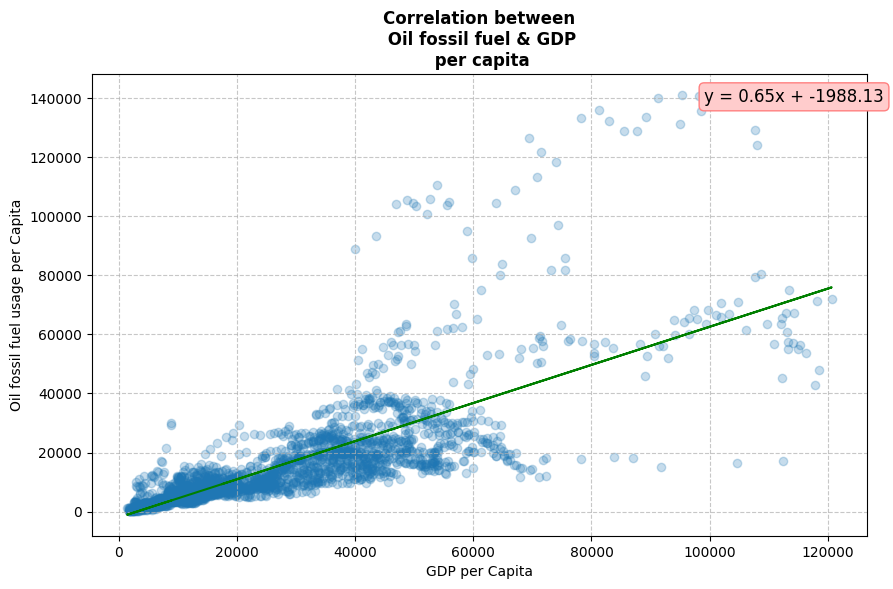

In [7]:
# Visualize the correlation for Oil

plt.figure(figsize=(10, 6))

# By using linear regression line in this chart we can find the general realtionship in GDP and Gini_index
slope, intercept = np.polyfit(df_final['GDP'],df_final['Oil'], 1)
plt.plot(df_final['GDP'], slope * df_final['GDP'] + intercept, color='green')

plt.scatter(df_final['GDP'],df_final['Oil'], alpha=0.25)

# Add the equation to the plot
equation = f"y = {slope:.2f}x + {intercept:.2f}"
plt.text(0.79, 0.95, equation, transform=plt.gca().transAxes, fontsize=12, va='center', bbox=dict(boxstyle="round", ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8)))

plt.xlabel('GDP per Capita')
plt.ylabel('Oil fossil fuel usage per Capita')
plt.title('Correlation between\n Oil fossil fuel & GDP\n per capita', fontweight = 'bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

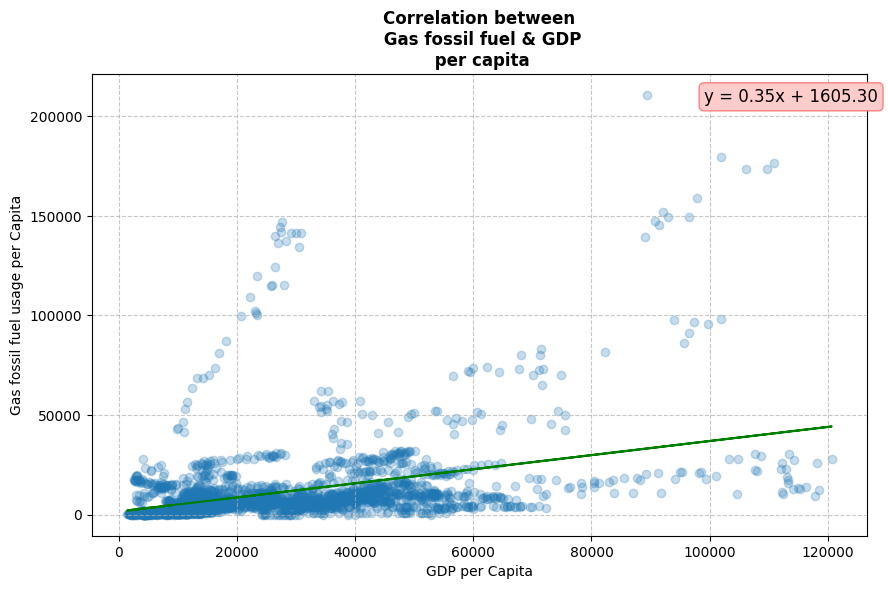

In [8]:
# Visualize the correlation for Gas

plt.figure(figsize=(10, 6))

# By using linear regression line in this chart we can find the general realtionship in GDP and Gini_index
slope, intercept = np.polyfit(df_final['GDP'],df_final['Gas'], 1)
plt.plot(df_final['GDP'], slope * df_final['GDP'] + intercept, color='green')

plt.scatter(df_final['GDP'],df_final['Gas'], alpha=0.25)

# Add the equation to the plot
equation = f"y = {slope:.2f}x + {intercept:.2f}"
plt.text(0.79, 0.95, equation, transform=plt.gca().transAxes, fontsize=12, va='center', bbox=dict(boxstyle="round", ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8)))

plt.xlabel('GDP per Capita')
plt.ylabel('Gas fossil fuel usage per Capita')
plt.title('Correlation between\n Gas fossil fuel & GDP\n per capita', fontweight = 'bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()